classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
ff_data=pd.read_csv('forestfires.csv')
ff_data
   

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Exploration

In [3]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# Drop the features which is not requried in visualization
data=ff_data.drop(ff_data.iloc[:, 11:30], axis = 1)
data.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


As we show that mean of DC is heigh that means data are not in same scale so we need to standardize the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


#### All the columns data types are correctly identified

In [7]:
# checking for nll values 
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
# checking for duplicate values
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [9]:
# Droping of duplicate
df=data.copy()
df=data.drop_duplicates()
df.shape

(509, 12)

In [10]:
# List of Numerical Variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))
print('Numeric variables are',numerical_features)


Number of numerical variables: 9
Numeric variables are ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [11]:
# List of Categorical Variables
categorical=[variable for variable in df.columns if df[variable].dtype=='O']
print('Number of categorical variables',len(categorical))
print('categorical variables are',categorical)

Number of categorical variables 3
categorical variables are ['month', 'day', 'size_category']


In [12]:
# checking for cardinality in categorical variables
for var in categorical:
  print( var,'contains',len(df[var].unique()),'labels')

month contains 12 labels
day contains 7 labels
size_category contains 2 labels


##### We can see that none of the columns contains large number of lables so we use dummies encoder

## Exploratory Data Analysis

In [13]:
# correlation between numeric data
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

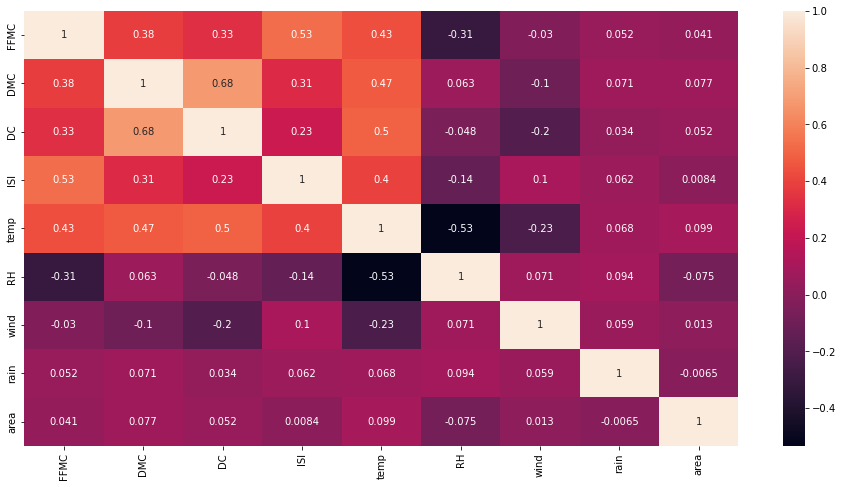

In [14]:
# Heatmap for numerical values for correlation
fig=plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True);
plt.xticks(rotation=90)

Their is no correlation between numeric features

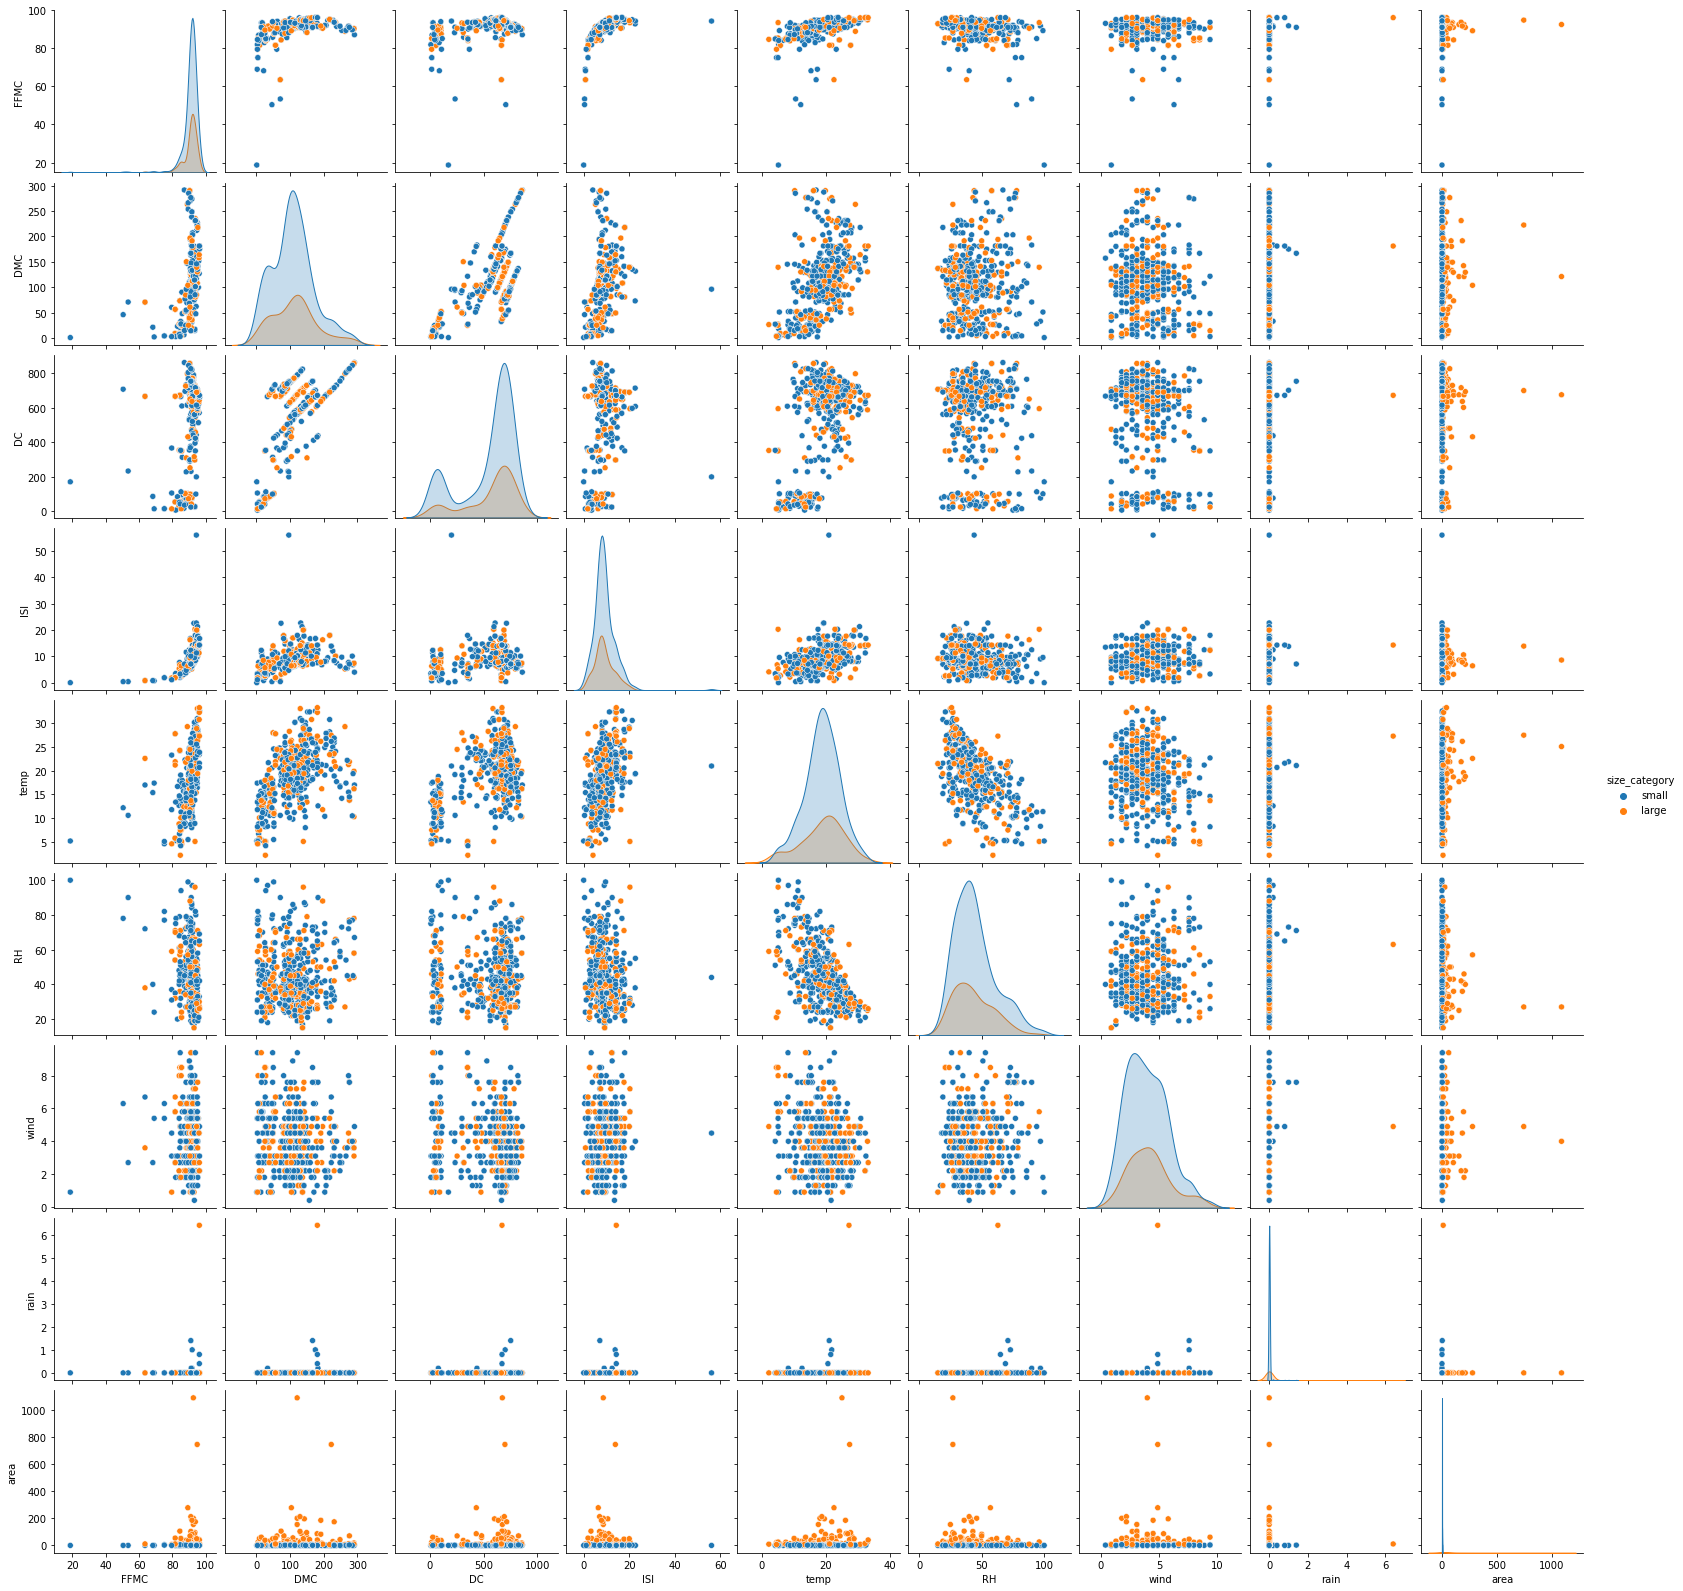

In [15]:
# pair plot data 
sns.pairplot(data=df,hue='size_category')

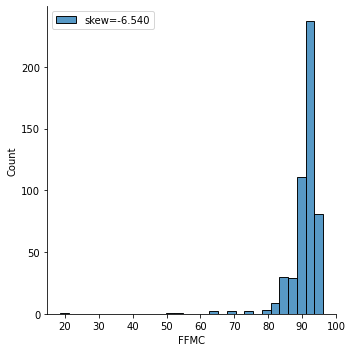

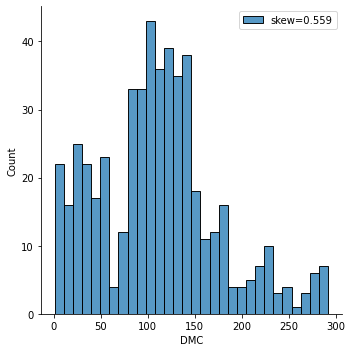

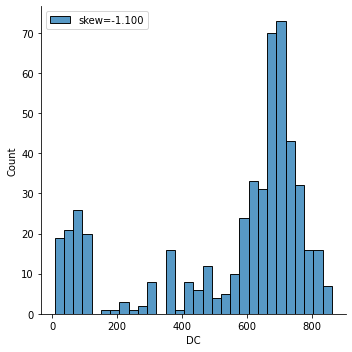

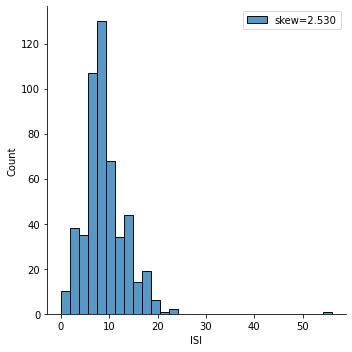

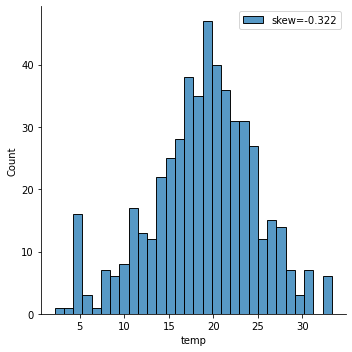

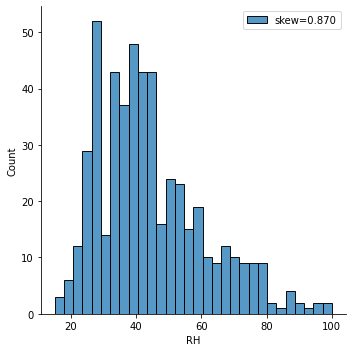

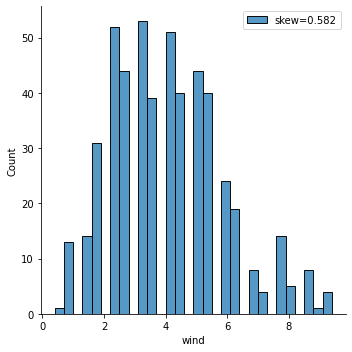

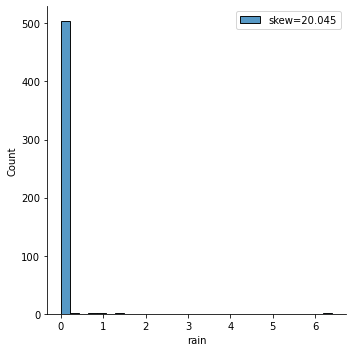

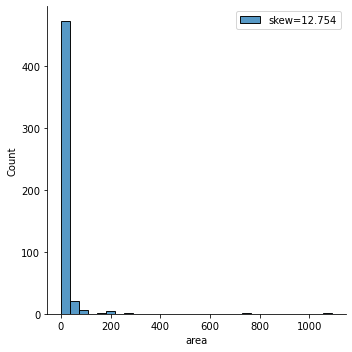

In [16]:
# Histogram for visualization of numeric variables
for feat in numerical_features:
  skew = df[feat].skew()
  sns.displot(df[feat],kde = False,label='skew=%.3f' %(skew),bins=30)
  plt.legend(loc='best')
  plt.show()

None of the feature are normally distributed.FFMC,rain and area are highly skewed

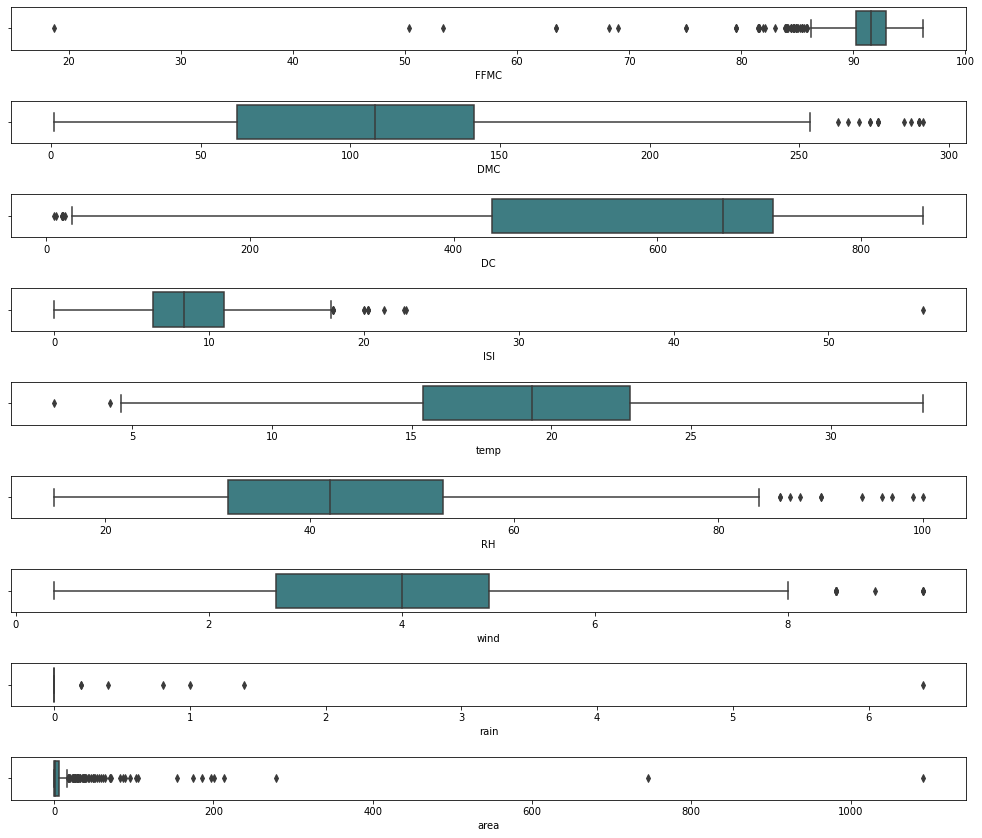

In [17]:
# Implementation of Boxplot for visualization of outlier
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='wind',data=df,palette='crest',ax=axes[6])
sns.boxplot(x='rain',data=df,palette='crest',ax=axes[7])
sns.boxplot(x='area',data=df,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

As we show that all numerical features contains outliers so we need to remove it.
And we also observe that temperature is in between 15 degree to 23 degree and wind is approx 3km/h to 5km/h which is not so heigh due to which forest fire do not cover large area.

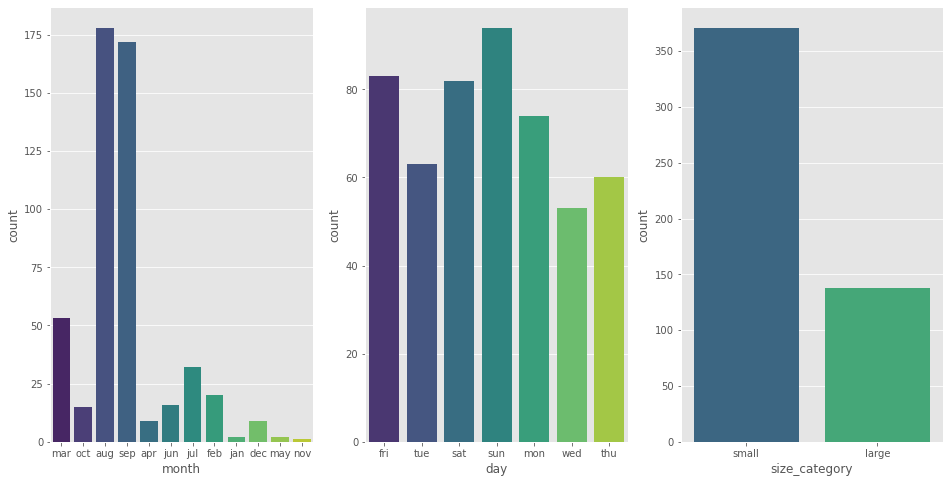

In [18]:
# Categorical features visualization by bar plot
plt.style.use("ggplot")
fig, ax =plt.subplots(1,3,squeeze=False, figsize=(16,8)) 
sns.countplot(df["month"], palette="viridis", ax=ax[0,0])
sns.countplot(df["day"], palette="viridis", ax=ax[0,1])
sns.countplot(df["size_category"], palette="viridis", ax=ax[0,2])
plt.show()

As we show that heigest number of forest fire is happned in august and september and from friday to monday cases are proportionaly higher.
We observe that number of small area damage is high while large area damage is low. 

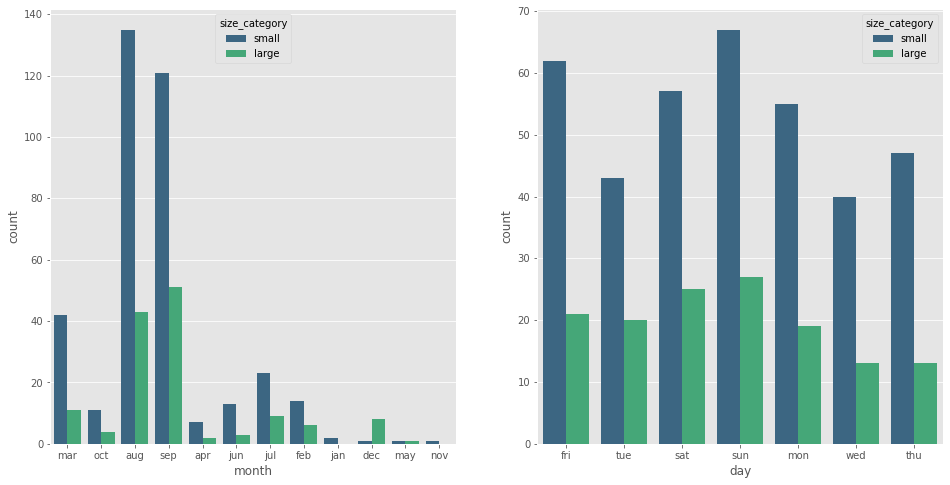

In [19]:
# plot of categorical features w.r.t. size_category
fig, ax =plt.subplots(1,2,squeeze=False, figsize=(16,8)) 
sns.countplot(x="month", data=df,palette="viridis", hue='size_category',ax=ax[0,0])
sns.countplot(x="day", data=df,palette="viridis", hue='size_category',ax=ax[0,1])
plt.show()


### Checking for balanced or Imblanced data for size_category

In [20]:
df['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

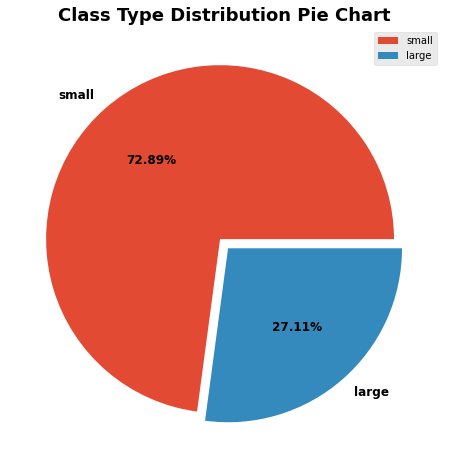

In [21]:
# pie plot for tax_val
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),labels=df.size_category.unique(),explode = [0.04,0.03],autopct= '%.2f%%',
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

We have imblance dataset 

### Data pre-processing

In [22]:
# converting categorical into integer
new_data=df.copy()
new_data=pd.get_dummies(df,columns=['month','day'],drop_first=False)
new_data['size_category'] = np.where(new_data['size_category'].str.contains("large"), 1, 0)
new_data.tail(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
506,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
509,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0,...,0,0,0,1,0,0,0,0,0,0
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0,...,0,0,0,1,0,0,0,0,0,0
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,...,0,0,0,0,0,0,1,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,1,0,0,0,0,0,0,0,1,0


In [23]:
x = new_data.drop('size_category',axis=1)
y = new_data[['size_category']]

# Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std


array([[-0.79603981, -1.31838569, -1.82893094, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [-0.00325666, -1.1740525 ,  0.48925693, ..., -0.36555477,
         2.66070763, -0.34092238],
       [-0.00325666, -1.04383887,  0.56104493, ..., -0.36555477,
        -0.37583987, -0.34092238],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [ 0.68141971,  0.56108339,  0.26985988, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [-2.00323234, -1.68235633, -1.77892132, ..., -0.36555477,
         2.66070763, -0.34092238]])

In [24]:
# Train_test Split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((356, 28), (356, 1), (153, 28), (153, 1))

## Model bulding with imblance data and default hyperparameter

In [25]:
model=SVC(random_state=0)

model.fit(x_train,y_train)

pred_train= model.predict(x_train)
print(f'Train Accuracy score of is',accuracy_score(y_train,pred_train))
print(f'Train Classification reoprt is\n',classification_report(y_train,pred_train))

pred_test= model.predict(x_test)
print(f'Test Accuracy score of is',accuracy_score(y_test,pred_test))
print(f'Test Classification reoprt is\n',classification_report(y_test,pred_test))

Train Accuracy score of is 0.7893258426966292
Train Classification reoprt is
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       255
           1       1.00      0.26      0.41       101

    accuracy                           0.79       356
   macro avg       0.89      0.63      0.64       356
weighted avg       0.84      0.79      0.74       356

Test Accuracy score of is 0.7843137254901961
Test Classification reoprt is
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       116
           1       0.83      0.14      0.23        37

    accuracy                           0.78       153
   macro avg       0.81      0.56      0.55       153
weighted avg       0.79      0.78      0.72       153



Due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

### Balance the Imblanced data using different technique

In [50]:
# Define function to build model for different technique 
def sampling(x_train,x_test,y_train,y_test):
    model=SVC(random_state=0)
    model.fit(x_train,y_train)
    pred_test_s=model.predict(x_test)
    print('Test classification Report\n',classification_report(y_test,pred_test_s))
    return()

#### Undersampling technique

In [59]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x_std, y)
y_under.value_counts()

size_category
0                138
1                138
dtype: int64

In [60]:
#spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.3,random_state=42,stratify=y_under)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.50      0.60      0.54        42
           1       0.48      0.39      0.43        41

    accuracy                           0.49        83
   macro avg       0.49      0.49      0.49        83
weighted avg       0.49      0.49      0.49        83



()

#### Oversampling technique

In [61]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x_std, y)
y_over.value_counts()

size_category
0                371
1                371
dtype: int64

In [62]:
# spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42,stratify=y_over)
# calling function
sampling(x_train,x_test,y_train,y_test)


Test classification Report
               precision    recall  f1-score   support

           0       0.67      0.80      0.73       112
           1       0.75      0.60      0.67       111

    accuracy                           0.70       223
   macro avg       0.71      0.70      0.70       223
weighted avg       0.71      0.70      0.70       223



()

#### SMOTE technique

In [63]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x_std,y)
y_sm.value_counts()

size_category
0                371
1                371
dtype: int64

In [64]:
# spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=42,stratify=y_sm)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.68      0.79      0.73       112
           1       0.75      0.62      0.68       111

    accuracy                           0.71       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.71      0.71      0.71       223



()

#### ADASYN Technique

In [65]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(sampling_strategy='minority')
x_ad,y_ad = smote.fit_resample(x_std,y)
y_ad.value_counts()

size_category
0                371
1                371
dtype: int64

In [66]:
# spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_ad,y_ad,test_size=0.3,random_state=42,stratify=y_ad)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       112
           1       0.73      0.77      0.75       111

    accuracy                           0.74       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.74      0.74      0.74       223



()

By implementing different techinique to balance the imblance data we find that ADASYN gives the best result. 

In [67]:
# split train test data with ADASYN technique

x_train,x_test,y_train,y_test=train_test_split(x_ad,y_ad,test_size=0.3,random_state=42,stratify=y_over)


#### kfoldvalidation

In [68]:
from sklearn.model_selection import KFold,cross_val_score
clf_svc = SVC(random_state=0)
cv = KFold(n_splits=10, shuffle=True, random_state=None)

results = cross_val_score(clf_svc,x_std ,y , cv=cv)
print(results.mean())

0.768156862745098


## SVM Model bulding for linear kernal with defalt parameters

In [71]:
model_linear=SVC(kernel='linear',random_state=0,probability=True)
model_linear.fit(x_train,y_train)

pred_linear_train=model_linear.predict(x_train)
print(f'Train Accuracy score of linear Kernel is',accuracy_score(y_train,pred_linear_train))
print(f'\nTrain Classification reoprt of linear Kernel is\n',classification_report(y_train,pred_linear_train))
print(f'\nTrain Confusion matrix reoprt of linear Kernel is\n',confusion_matrix(y_train, pred_linear_train))

pred_linear_test= model_linear.predict(x_test)
print(f'Test Accuracy score of linear Kernel is',accuracy_score(y_test,pred_linear_test))
print(f'\nTest Classification reoprt of linear Kernel is\n',classification_report(y_test,pred_linear_test))
print(f'\nTest Confusion matrix reoprt of linear Kernel is\n',confusion_matrix(y_test, pred_linear_test))

Train Accuracy score of linear Kernel is 0.9710982658959537

Train Classification reoprt of linear Kernel is
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       259
           1       1.00      0.95      0.97       260

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519


Train Confusion matrix reoprt of linear Kernel is
 [[258   1]
 [ 14 246]]
Test Accuracy score of linear Kernel is 0.9775784753363229

Test Classification reoprt of linear Kernel is
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       112
           1       0.98      0.97      0.98       111

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223


Test Confusion matrix reoprt of linear Kernel is
 [[

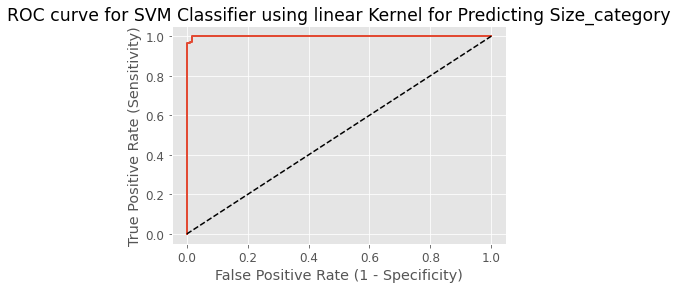

ROC AUC : 0.9994


In [72]:
# Roc Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_linear1 = model_linear.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, pred_linear1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_linear1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

## SVM Model bulding for Radial Basis Functions kernal with defalt parameters

In [73]:
model_rbf=SVC(kernel='rbf',random_state=0,probability=True)
model_rbf.fit(x_train,y_train)

pred_rbf_train=model_rbf.predict(x_train)
print(f'Train Accuracy score of rbf Kernel is',accuracy_score(y_train,pred_rbf_train))
print(f'\nTrain Classification reoprt of rbf Kernel is\n',classification_report(y_train,pred_rbf_train))
print(f'\nTrain Confusion matrix reoprt of rbf Kernel is\n',confusion_matrix(y_train, pred_rbf_train))

pred_rbf_test= model_rbf.predict(x_test)
print(f'Test Accuracy score of rbf Kernel is',accuracy_score(y_test,pred_rbf_test))
print(f'\nTest Classification reoprt of rbf Kernel is\n',classification_report(y_test,pred_rbf_test))
print(f'\nTest Confusion matrix reoprt of rbf Kernel is\n',confusion_matrix(y_test, pred_rbf_test))

Train Accuracy score of rbf Kernel is 0.7938342967244701

Train Classification reoprt of rbf Kernel is
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       259
           1       0.81      0.77      0.79       260

    accuracy                           0.79       519
   macro avg       0.79      0.79      0.79       519
weighted avg       0.79      0.79      0.79       519


Train Confusion matrix reoprt of rbf Kernel is
 [[211  48]
 [ 59 201]]
Test Accuracy score of rbf Kernel is 0.7443946188340808

Test Classification reoprt of rbf Kernel is
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       112
           1       0.73      0.77      0.75       111

    accuracy                           0.74       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.74      0.74      0.74       223


Test Confusion matrix reoprt of rbf Kernel is
 [[81 31]
 [26 85]]


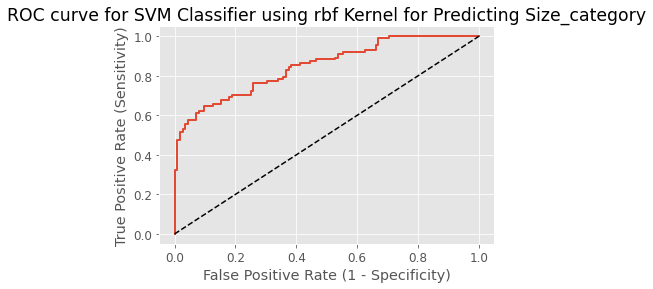

ROC AUC : 0.8472


In [74]:
# Roc Curve plotting and finding AUC value

pred_rbf1 = model_rbf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, pred_rbf1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using rbf Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_rbf1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

## SVM Model bulding for Polynomial kernal with defalt parameters

In [75]:
model_poly=SVC(kernel='poly',random_state=0,probability=True)
model_poly.fit(x_train,y_train)

pred_poly_train=model_poly.predict(x_train)
print(f'Train Accuracy score of poly Kernel is',accuracy_score(y_train,pred_poly_train))
print(f'\nTrain Classification reoprt of poly Kernel is\n',classification_report(y_train,pred_poly_train))
print(f'\nTrain Confusion matrix reoprt of poly Kernel is\n',confusion_matrix(y_train, pred_poly_train))

pred_poly_test= model_poly.predict(x_test)
print(f'Test Accuracy score of poly Kernel is',accuracy_score(y_test,pred_poly_test))
print(f'\nTest Classification reoprt of poly Kernel is\n',classification_report(y_test,pred_poly_test))
print(f'\nTest Confusion matrix reoprt of poly Kernel is\n',confusion_matrix(y_test, pred_poly_test))

Train Accuracy score of poly Kernel is 0.7803468208092486

Train Classification reoprt of poly Kernel is
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       259
           1       0.76      0.83      0.79       260

    accuracy                           0.78       519
   macro avg       0.78      0.78      0.78       519
weighted avg       0.78      0.78      0.78       519


Train Confusion matrix reoprt of poly Kernel is
 [[189  70]
 [ 44 216]]
Test Accuracy score of poly Kernel is 0.6591928251121076

Test Classification reoprt of poly Kernel is
               precision    recall  f1-score   support

           0       0.69      0.58      0.63       112
           1       0.64      0.74      0.68       111

    accuracy                           0.66       223
   macro avg       0.66      0.66      0.66       223
weighted avg       0.66      0.66      0.66       223


Test Confusion matrix reoprt of poly Kernel is
 [[65 47]
 [29 

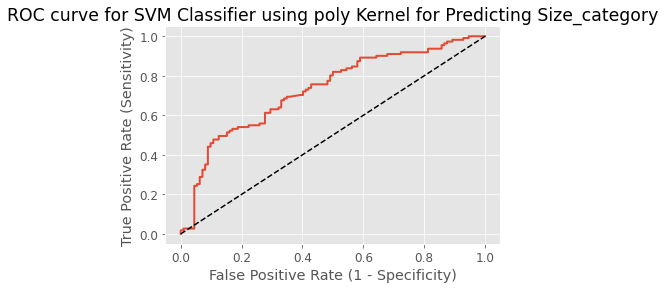

ROC AUC : 0.7288


In [76]:
# Roc Curve plotting and finding AUC value

pred_poly1 = model_poly.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, pred_poly1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using poly Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_poly1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

## SVM Model bulding for Sigmoid with defalt parameters

In [77]:
model_sigmoid=SVC(kernel='sigmoid',random_state=0,probability=True)
model_sigmoid.fit(x_train,y_train)

pred_sigmoid_train=model_sigmoid.predict(x_train)
print(f'Train Accuracy score of sigmoid Kernel is',accuracy_score(y_train,pred_sigmoid_train))
print(f'\nTrain Classification reoprt of sigmoid Kernel is\n',classification_report(y_train,pred_sigmoid_train))
print(f'\nTrain Confusion matrix reoprt of sigmoid Kernel is\n',confusion_matrix(y_train, pred_sigmoid_train))

pred_sigmoid_test= model_sigmoid.predict(x_test)
print(f'Test Accuracy score of sigmoid Kernel is',accuracy_score(y_test,pred_sigmoid_test))
print(f'\nTest Classification reoprt of sigmoid Kernel is\n',classification_report(y_test,pred_sigmoid_test))
print(f'\nTest Confusion matrix reoprt of sigmoid Kernel is\n',confusion_matrix(y_test, pred_sigmoid_test))

Train Accuracy score of sigmoid Kernel is 0.6936416184971098

Train Classification reoprt of sigmoid Kernel is
               precision    recall  f1-score   support

           0       0.65      0.82      0.73       259
           1       0.76      0.57      0.65       260

    accuracy                           0.69       519
   macro avg       0.71      0.69      0.69       519
weighted avg       0.71      0.69      0.69       519


Train Confusion matrix reoprt of sigmoid Kernel is
 [[213  46]
 [113 147]]
Test Accuracy score of sigmoid Kernel is 0.7085201793721974

Test Classification reoprt of sigmoid Kernel is
               precision    recall  f1-score   support

           0       0.69      0.78      0.73       112
           1       0.74      0.64      0.69       111

    accuracy                           0.71       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.71      0.71      0.71       223


Test Confusion matrix reoprt of sigmoid Kernel 

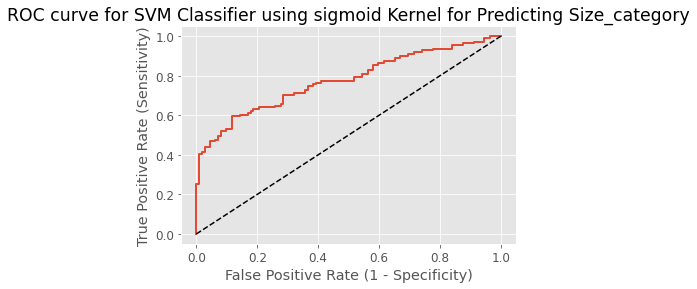

ROC AUC : 0.7750


In [78]:
# Roc Curve plotting and finding AUC value

pred_sigmoid1 = model_sigmoid.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, pred_sigmoid1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using sigmoid Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_sigmoid1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

As we show that with default parametes our linear kernel gives the best result. Now try with hyperparameter tuning.

### Hyperparameter Tuning for SVM

In [83]:
clf_ig = SVC(probability=True,random_state=0)

param_grid_i = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
             'gamma': [1, 0.1, 0.01, 0.001,0.0001,0.00001],
                  'C': [1000, 100, 10, 1]}

gsv_i = GridSearchCV(clf_ig, param_grid = param_grid_i, cv = cv, scoring = "accuracy",  n_jobs = -1, verbose = 1)

gsv_i.fit(x_train,y_train)

svm_best_i = gsv.best_estimator_
print(svm_best_i)
print(gsv_i.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
SVC(C=100, gamma=0.0001, kernel='linear', random_state=0)
0.9846153846153847


## SVM Model Bulding with Hyperparameter values


In [84]:
model_final=gsv_i.best_estimator_

# Fit the model with smote data
model_final.fit(x_train,y_train)

# predict the values

pred_final_train=model_final.predict(x_train)
print(f'Train Accuracy score of final model is',accuracy_score(y_train,pred_final_train))
print(f'\nTrain Classification reoprt of final model is\n',classification_report(y_train,pred_final_train))
print(f'\nTrain Confusion matrix reoprt of final model is\n',confusion_matrix(y_train, pred_final_train))

pred_final_test= model_final.predict(x_test)
print(f'Test Accuracy score of final model is',accuracy_score(y_test,pred_final_test))
print(f'\nTest Classification reoprt of final model is\n',classification_report(y_test,pred_final_test))
print(f'\nTest Confusion matrix reoprt of final model is\n',confusion_matrix(y_test, pred_final_test))

Train Accuracy score of final model is 1.0

Train Classification reoprt of final model is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       260

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519


Train Confusion matrix reoprt of final model is
 [[259   0]
 [  0 260]]
Test Accuracy score of final model is 0.9910313901345291

Test Classification reoprt of final model is
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.98      0.99       111

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223


Test Confusion matrix reoprt of final model is
 [[112   0]
 [  2 109]]


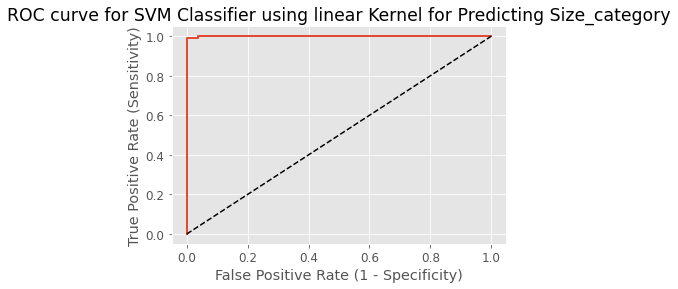

ROC AUC : 0.9997


In [85]:
# Roc Curve plotting and finding AUC value

pred_final1 = model_final.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve( y_test, pred_final1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
ROC_AUC = roc_auc_score(y_test, pred_final1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### Prediction  for new dataset

In [86]:
model_final.predict([[86.2,26.2,94.3,5.1,8.2,51,6.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0]])

array([1])

## Conclusion

+ When we balance the imbalance dataset we find that ADASNY gives the best result.
+ As we show that heigest number of forest fire is happned in august and september and from friday to monday cases are proportionaly higher.We observe that number of small area damage is high while large area damage is low. 
+ When we build our model with default parameters we found that linear kernel do good prediction.
+ When we tune hyperparameter we finf that it gives linear kernel with regularization(C)=100,gamma=0.0001. So, we conclude that our model do good prediction.
+ ROC AUC of our model is very close to 1. So, we conclude that our classifier do a good job in predicting wheather the damage area is large or small